<hr style='margin-bottom:30px'>

# The Impact of Federal Reserve Interest Rates on S&P 500 Performance: A Statistical and Multivariate Analysis  
### Inflation as a Mediator Between Federal Funds Rate and S&P 500. Does inflation mediate the relationship between the federal funds rate and the S&P 500?


____

<img src='https://www.bankatfirst.com/content/dam/bankatfirst/personal/discover/flourish/interest-rates-rising-article-1536x755.jpg' style='float:right; margin: 30px 30px 30px 30px; width:300px'>

Abdallah Abdelmoneim   
Dept of Data Analytics of   
Long Island University  
New York,  United States

Data Used: [FredAPI](https://fred.stlouisfed.org/docs/api/fred/)

__Series and Frames used__
|Data|Definition|
|----|----------|
|SP500|S&P 500 performance|
|FEDFUNDS|Benchmark interest rate set by the Federal Reserve|
|CPIAUCSL|Consumer price index for All Urban Consumers (Inflation Rates)|



![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

### __Step 1: Imports and Setup__

In [93]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import os 
from fredapi import Fred 
from functools import reduce
import plotly.io as pio
import plotly.express as px
pio.renderers.default = 'iframe'

color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]


API_KEY = os.environ['FRED_API']

pd.set_option('display.max_columns',200)
pd.set_option('display.float_format','{:.2f}'.format)
plt.style.use('ggplot')
sns.set_context('notebook')
sns.set_style('darkgrid')

fred = Fred(api_key = API_KEY)

In [94]:
sp_search = fred.search('S&P',order_by='popularity')
sp_search.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
BAMLH0A0HYM2,BAMLH0A0HYM2,2024-12-16,2024-12-16,ICE BofA US High Yield Index Option-Adjusted S...,1996-12-31,2024-12-12,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2024-12-13 08:54:09-06:00,92,The ICE BofA Option-Adjusted Spreads (OASs) ar...
CSUSHPINSA,CSUSHPINSA,2024-12-16,2024-12-16,S&P CoreLogic Case-Shiller U.S. National Home ...,1987-01-01,2024-09-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2024-11-26 08:12:02-06:00,88,"For more information regarding the index, plea..."
SP500,SP500,2024-12-16,2024-12-16,S&P 500,2014-12-15,2024-12-13,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2024-12-13 19:11:46-06:00,83,The observations for the S&P 500 represent the...
BAMLH0A0HYM2EY,BAMLH0A0HYM2EY,2024-12-16,2024-12-16,ICE BofA US High Yield Index Effective Yield,1996-12-31,2024-12-12,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2024-12-13 08:54:12-06:00,82,This data represents the effective yield of th...
BAMLC0A0CM,BAMLC0A0CM,2024-12-16,2024-12-16,ICE BofA US Corporate Index Option-Adjusted Sp...,1996-12-31,2024-12-12,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2024-12-13 09:00:01-06:00,78,The ICE BofA Option-Adjusted Spreads (OASs) ar...


In [95]:
sp500 = pd.DataFrame(fred.get_series('sp500',frequency='m'))
federal_funds_rate = pd.DataFrame(fred.get_series("FEDFUNDS",frequency='m'))
cpi = pd.DataFrame(fred.get_series('CPIAUCSL',frequency='m'))
unrate = pd.DataFrame(fred.get_series('UNRATE',frequency='q'))

In [96]:
dfs = [sp500, federal_funds_rate, cpi, unrate]
names = ['sp500','federal_funds_rate','cpi','unemployment']
dfs_names = list(zip(dfs, names))
print(dfs_names)

[(                 0
2014-12-01     NaN
2015-01-01 2028.18
2015-02-01 2082.20
2015-03-01 2079.99
2015-04-01 2094.86
...            ...
2024-08-01 5478.21
2024-09-01 5621.26
2024-10-01 5792.32
2024-11-01 5929.92
2024-12-01     NaN

[121 rows x 1 columns], 'sp500'), (              0
1954-07-01 0.80
1954-08-01 1.22
1954-09-01 1.07
1954-10-01 0.85
1954-11-01 0.83
...         ...
2024-07-01 5.33
2024-08-01 5.33
2024-09-01 5.13
2024-10-01 4.83
2024-11-01 4.64

[845 rows x 1 columns], 'federal_funds_rate'), (                0
1947-01-01  21.48
1947-02-01  21.62
1947-03-01  22.00
1947-04-01  22.00
1947-05-01  21.95
...           ...
2024-07-01 313.53
2024-08-01 314.12
2024-09-01 314.69
2024-10-01 315.45
2024-11-01 316.44

[935 rows x 1 columns], 'cpi'), (              0
1948-01-01 3.70
1948-04-01 3.70
1948-07-01 3.80
1948-10-01 3.80
1949-01-01 4.70
...         ...
2023-10-01 3.70
2024-01-01 3.80
2024-04-01 4.00
2024-07-01 4.20
2024-10-01  NaN

[308 rows x 1 columns], 'unemployment')]


In [9]:
for i in dfs_names:
    i[0].sort_index(ascending=True, inplace=True)
    i[0].rename(columns={0:i[1]},inplace=True)
    i[0].index = pd.to_datetime(i[0].index)

In [10]:
sp500

,sp500
2014-12-01,NaN
2015-01-01,2028.18
2015-02-01,2082.20
2015-03-01,2079.99
2015-04-01,2094.86
...,...
2024-08-01,5478.21
2024-09-01,5621.26
2024-10-01,5792.32
2024-11-01,5929.92


In [11]:
cpi

,cpi
1947-01-01,21.48
1947-02-01,21.62
1947-03-01,22.00
1947-04-01,22.00
1947-05-01,21.95
...,...
2024-07-01,313.53
2024-08-01,314.12
2024-09-01,314.69
2024-10-01,315.45


In [12]:
unrate

,unemployment
1948-01-01,3.70
1948-04-01,3.70
1948-07-01,3.80
1948-10-01,3.80
1949-01-01,4.70
...,...
2023-10-01,3.70
2024-01-01,3.80
2024-04-01,4.00
2024-07-01,4.20


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### __Step 2: Data Preperation__ 

In [13]:
df = reduce(lambda left, right: pd.merge(left,right, left_index=True, right_index=True,how='inner'), dfs)
# df = pd.concat(dfs, axis=1, join='inner')
df.sort_index(ascending=False)

,sp500,federal_funds_rate,cpi,unemployment
2024-10-01,5792.32,4.83,315.45,NaN
2024-07-01,5538.00,5.33,313.53,4.20
2024-04-01,5112.49,5.33,313.21,4.00
2024-01-01,4804.49,5.33,309.69,3.80
2023-10-01,4269.40,5.33,307.53,3.70
2023-07-01,4508.08,5.12,304.63,3.70
2023-04-01,4121.47,4.83,303.03,3.60
2023-01-01,3960.66,4.33,300.36,3.50
2022-10-01,3726.05,3.08,297.86,3.60
2022-07-01,3911.73,1.68,294.98,3.50


In [14]:
df.isna().sum()

sp500                 0
federal_funds_rate    0
cpi                   0
unemployment          1
dtype: int64

In [15]:
df.loc[df['unemployment'].isna()]

,sp500,federal_funds_rate,cpi,unemployment
2024-10-01,5792.32,4.83,315.45,NaN


In [16]:
df.tail(5)

,sp500,federal_funds_rate,cpi,unemployment
2023-10-01,4269.40,5.33,307.53,3.70
2024-01-01,4804.49,5.33,309.69,3.80
2024-04-01,5112.49,5.33,313.21,4.00
2024-07-01,5538.00,5.33,313.53,4.20
2024-10-01,5792.32,4.83,315.45,NaN


In [17]:
df.dropna(inplace=True)

In [18]:
df.tail(5)

,sp500,federal_funds_rate,cpi,unemployment
2023-07-01,4508.08,5.12,304.63,3.70
2023-10-01,4269.40,5.33,307.53,3.70
2024-01-01,4804.49,5.33,309.69,3.80
2024-04-01,5112.49,5.33,313.21,4.00
2024-07-01,5538.00,5.33,313.53,4.20


In [19]:
df[df.duplicated()].sum()

sp500                0.00
federal_funds_rate   0.00
cpi                  0.00
unemployment         0.00
dtype: float64

In [20]:
df.index.unique()

DatetimeIndex(['2015-01-01', '2015-04-01', '2015-07-01', '2015-10-01',
               '2016-01-01', '2016-04-01', '2016-07-01', '2016-10-01',
               '2017-01-01', '2017-04-01', '2017-07-01', '2017-10-01',
               '2018-01-01', '2018-04-01', '2018-07-01', '2018-10-01',
               '2019-01-01', '2019-04-01', '2019-07-01', '2019-10-01',
               '2020-01-01', '2020-04-01', '2020-07-01', '2020-10-01',
               '2021-01-01', '2021-04-01', '2021-07-01', '2021-10-01',
               '2022-01-01', '2022-04-01', '2022-07-01', '2022-10-01',
               '2023-01-01', '2023-04-01', '2023-07-01', '2023-10-01',
               '2024-01-01', '2024-04-01', '2024-07-01'],
              dtype='datetime64[ns]', freq=None)

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### __Step 3: Trends__

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 39 entries, 2015-01-01 to 2024-07-01
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sp500               39 non-null     float64
 1   federal_funds_rate  39 non-null     float64
 2   cpi                 39 non-null     float64
 3   unemployment        39 non-null     float64
dtypes: float64(4)
memory usage: 2.6 KB


In [22]:
df.describe()

,sp500,federal_funds_rate,cpi,unemployment
count,39.00,39.00,39.00,39.00
mean,3257.04,1.67,265.00,4.69
std,1007.39,1.83,25.46,1.74
min,1918.60,0.05,234.75,3.50
25%,2406.70,0.12,244.22,3.75
50%,2977.68,1.15,256.13,4.20
75%,4131.33,2.40,285.58,4.95
max,5538.00,5.33,313.53,13.00


C:\Users\abdal\AppData\Local\Temp\ipykernel_12040\2371682248.py:4: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



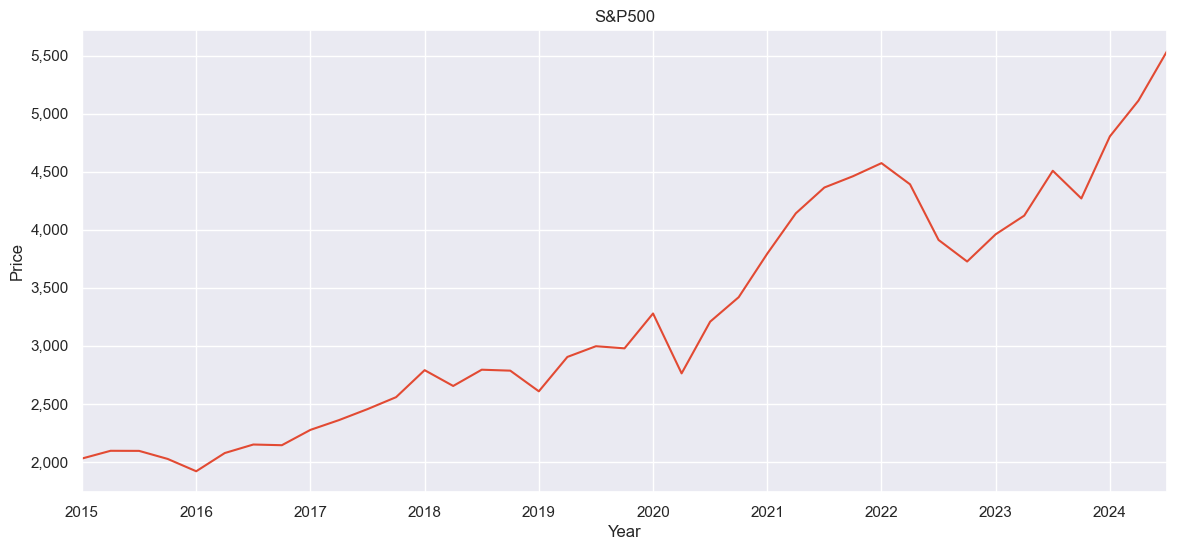

In [23]:
ax= df['sp500'].plot(kind='line',figsize=(14,6),title='S&P500')
ax.set_xlabel("Year")
ax.set_ylabel("Price")
ax.set_yticklabels(['{:,.0f}'.format(i) for i in plt.yticks()[0]])
plt.show()

In [24]:
df.columns

Index(['sp500', 'federal_funds_rate', 'cpi', 'unemployment'], dtype='object')

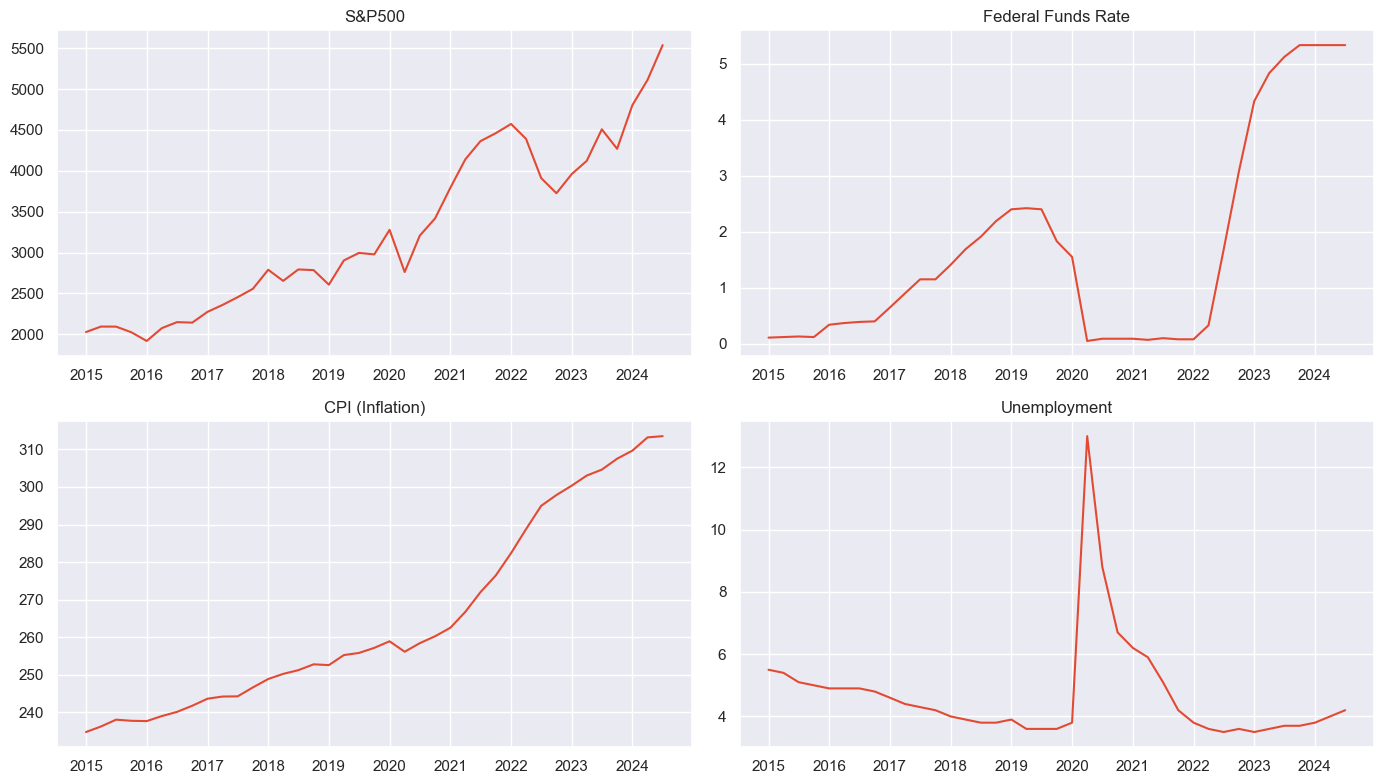

In [25]:
fig, ax = plt.subplots(2,2,figsize=(14,8))

ax[0,0].plot(df['sp500'])
ax[0,0].set_title('S&P500')
ax[0,1].plot(df['federal_funds_rate'])
ax[0,1].set_title('Federal Funds Rate')
ax[1,0].plot(df['cpi'])
ax[1,0].set_title('CPI (Inflation)')
ax[1,1].plot(df['unemployment'])
ax[1,1].set_title('Unemployment')

plt.tight_layout()
plt.show()

In [26]:
corr = df.corr()
corr

,sp500,federal_funds_rate,cpi,unemployment
sp500,1.00,0.57,0.92,-0.20
federal_funds_rate,0.57,1.00,0.76,-0.44
cpi,0.92,0.76,1.00,-0.27
unemployment,-0.20,-0.44,-0.27,1.00


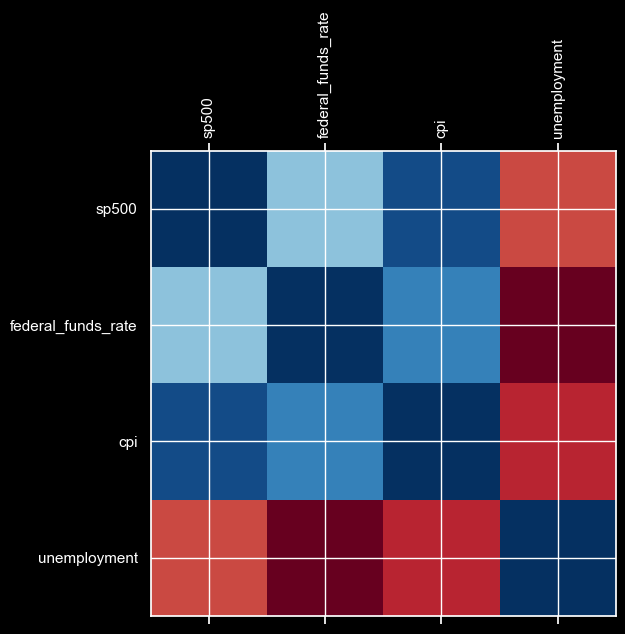

In [27]:
plt.style.use('dark_background')
fig = plt.figure(figsize=(14,6))
plt.matshow(corr, cmap='RdBu',fignum=fig.number)
plt.xticks(range(len(corr.columns)),corr.columns,rotation='vertical')
plt.yticks(range(len(corr.columns)),corr.columns)
plt.show()

<Axes: >

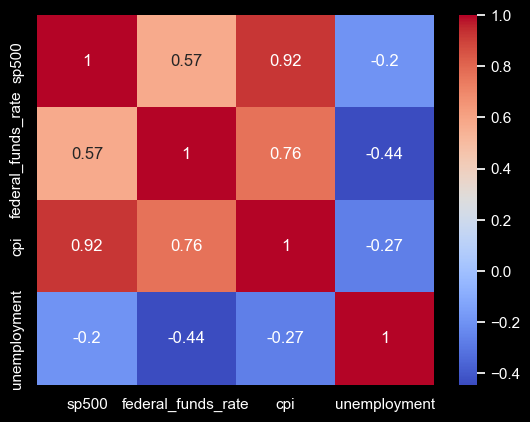

In [28]:
sns.heatmap(data=corr,annot=True,cmap='coolwarm')

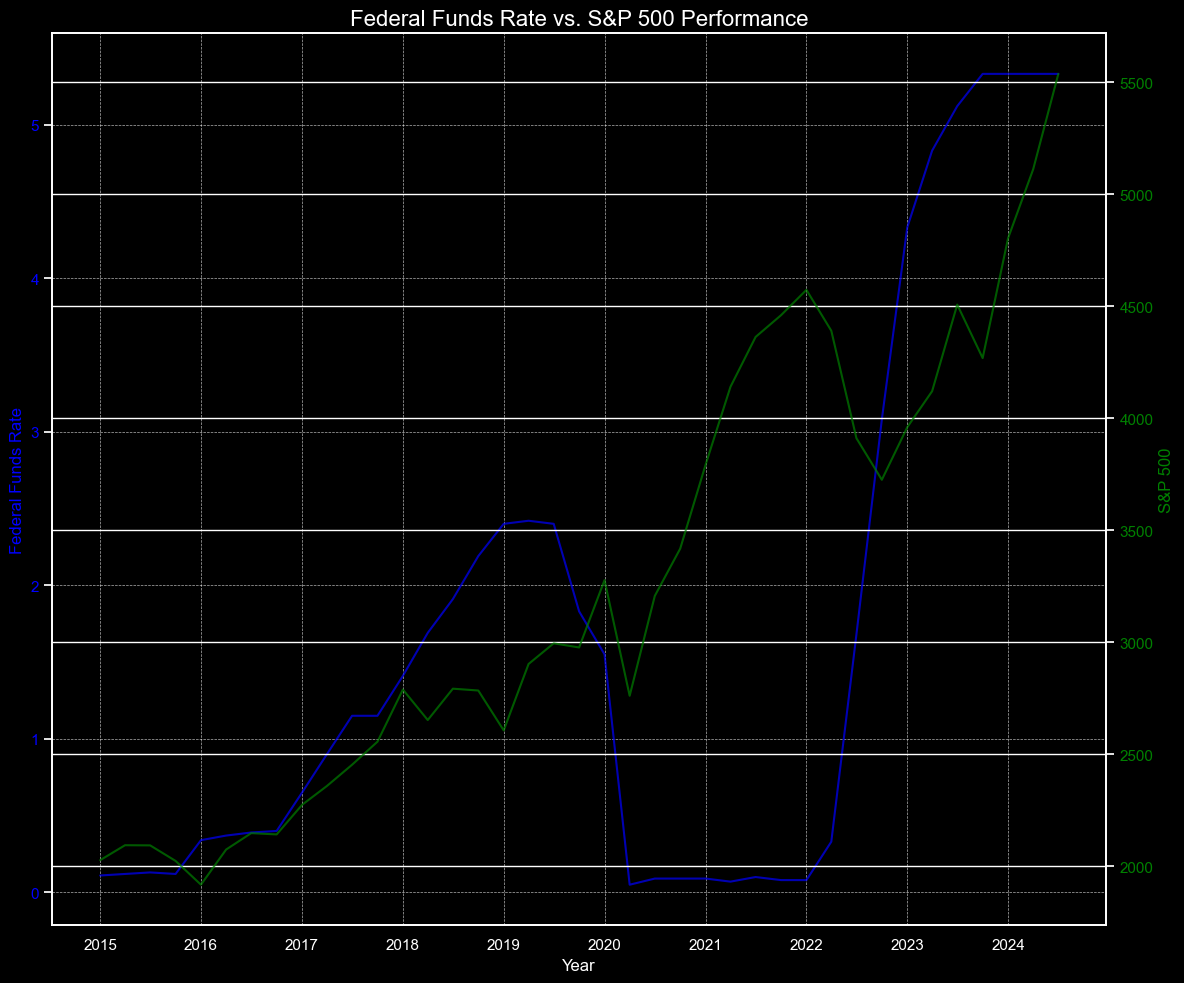

In [29]:
fig, ax1 = plt.subplots(figsize=(12, 10))

ax1.plot(df.index, df['federal_funds_rate'], label='Federal Funds Rate', color='blue', alpha=0.7)
ax1.set_ylabel('Federal Funds Rate', fontsize=12, color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

ax2 = ax1.twinx()
ax2.plot(df.index, df['sp500'], label='S&P 500', color='green', alpha=0.7)
ax2.set_ylabel('S&P 500', fontsize=12, color='green')
ax2.tick_params(axis='y', labelcolor='green')

plt.title('Federal Funds Rate vs. S&P 500 Performance', fontsize=16)
ax1.set_xlabel('Year', fontsize=12)

fig.tight_layout()  
plt.show()


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### __Step 4: Statistics__
#### To investigate whether inflation mediates the relationship between the federal funds rate (IV) and the S&P 500 (DV).

In [30]:
df

,sp500,federal_funds_rate,cpi,unemployment
2015-01-01,2028.18,0.11,234.75,5.50
2015-04-01,2094.86,0.12,236.22,5.40
2015-07-01,2094.14,0.13,238.03,5.10
2015-10-01,2024.81,0.12,237.73,5.00
2016-01-01,1918.60,0.34,237.65,4.90
2016-04-01,2075.54,0.37,238.99,4.90
2016-07-01,2148.90,0.39,240.10,4.90
2016-10-01,2143.02,0.40,241.74,4.80
2017-01-01,2275.12,0.65,243.62,4.60
2017-04-01,2359.31,0.90,244.19,4.40


__Direct effect__: How the independent variable (Federal Funds Rate) affects the dependent variable (S&P 500) directly.  
__Indirect effect__: How the independent variable affects the dependent variable through the mediator (Inflation).

__Independent Variable (IV)__: The variable I believe influences the outcome indirectly (e.g., Federal Funds Rate).  
__Mediator (M)__: The variable through which the IV is hypothesized to affect the outcome (e.g., Inflation).  
__Dependent Variable (DV)__: The outcome variable (e.g., S&P 500).

>#### Step 1: Define Hypotheses  
H1: The Federal Funds Rate influences Inflation.  
H2: Inflation influences the S&P 500.  
H3: The Federal Funds Rate indirectly affects the S&P 500 through Inflation.

>#### Step 2: Fit the Models  
Path A (IV → Mediator): Regress the mediator on the independent variable to estimate how the IV influences the mediator.  
__𝑀=𝛽0+𝛽1×𝐼𝑉+𝜖__  
Path B (Mediator → DV): Regress the dependent variable on both the mediator and the independent variable to estimate the mediator's effect on the DV, controlling for the IV.  
__𝐷𝑉=𝛽0+𝛽1×𝑀+𝛽2×𝐼𝑉+𝜖__  
Total Effect (IV → DV): Regress the dependent variable on the independent variable to estimate the total effect.  
__𝐷𝑉=𝛽0+𝛽1×𝐼𝑉+𝜖__


> #### Step 3: Calculate the Effects  
__Direct Effect__: The effect of the IV on the DV after accounting for the mediator (𝛽2 in Path B).  
__Indirect Effect__: The effect of the IV on the DV through the mediator. This is calculated as:  
Indirect Effect = (𝛽1 from Path A) × (𝛽1 from Path B)  
__Total Effect__: The sum of the direct and indirect effects.  

> #### Step 4: Test the Significance of the Indirect Effect  
Use a statistical test to determine whether the indirect effect is significant:  
__Sobel Test__: Tests the significance of the indirect effect using the standard errors of Path A and Path B.  
__Bootstrapping__: Repeatedly samples the data to compute confidence intervals for the indirect effect (preferred for small sample sizes or non-normal data).  


> #### Step 5: Interpret Results  
If the indirect effect is significant, the mediator explains part of the relationship between the IV and the DV.  
Check the direct effect to determine whether the IV still has an influence on the DV after accounting for the mediator:  
If the direct effect becomes non-significant, the mediation is full.  
If the direct effect remains significant, the mediation is partial.  

>#### Step 6: Report Findings  
Report the coefficients (𝛽) for each path.  
Discuss the significance of the direct, indirect, and total effects.  
Include a mediation diagram to visualize the relationships.  

IV: federal_funds_rate  
Mediator (M): cpi (proxy for inflation)  
DV: sp500

In [33]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.mediation import Mediation

## Path A: IV → Mediator
__This estimates how federal_funds_rate (IV) influences cpi (Mediator):__

In [73]:
model_a_fitted = ols("cpi ~ federal_funds_rate", data=df).fit()
print("Path A: IV → Mediator")
print(model_a_fitted.summary())

Path A: IV → Mediator
                            OLS Regression Results                            
Dep. Variable:                    cpi   R-squared:                       0.583
Model:                            OLS   Adj. R-squared:                  0.572
Method:                 Least Squares   F-statistic:                     51.81
Date:                Mon, 16 Dec 2024   Prob (F-statistic):           1.55e-08
Time:                        00:44:10   Log-Likelihood:                -164.01
No. Observations:                  39   AIC:                             332.0
Df Residuals:                      37   BIC:                             335.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept     

## Path B: Mediator + IV → DV
__This estimates how cpi (Mediator) and federal_funds_rate (IV) jointly influence sp500 (DV):__

In [74]:
model_b_fitted = ols("sp500 ~ cpi + federal_funds_rate", data=df).fit()
print("\nPath B: Mediator + IV → DV")
print(model_b_fitted.summary())


Path B: Mediator + IV → DV
                            OLS Regression Results                            
Dep. Variable:                  sp500   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     155.7
Date:                Mon, 16 Dec 2024   Prob (F-statistic):           1.90e-18
Time:                        00:44:14   Log-Likelihood:                -280.31
No. Observations:                  39   AIC:                             566.6
Df Residuals:                      36   BIC:                             571.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercep

## Total Effect: IV → DV
__This estimates the total effect of federal_funds_rate (IV) on sp500 (DV) without accounting for the mediator:__

In [75]:
model_total = ols("sp500 ~ federal_funds_rate", data=df).fit()
print("\nTotal Effect: IV → DV")
print(model_total.summary())


Total Effect: IV → DV
                            OLS Regression Results                            
Dep. Variable:                  sp500   R-squared:                       0.327
Model:                            OLS   Adj. R-squared:                  0.308
Method:                 Least Squares   F-statistic:                     17.95
Date:                Mon, 16 Dec 2024   Prob (F-statistic):           0.000144
Time:                        00:44:17   Log-Likelihood:                -316.81
No. Observations:                  39   AIC:                             637.6
Df Residuals:                      37   BIC:                             640.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept    

## Using the Mediation Package
__The mediation package allows to calculate the indirect effect directly:__

In [76]:
model_a = ols("cpi ~ federal_funds_rate", data=df)
model_b = ols("sp500 ~ cpi + federal_funds_rate", data=df)

In [77]:
mediation = Mediation(model_b, model_a, "federal_funds_rate", "cpi")
mediation_results = mediation.fit(n_rep=1000)  # Bootstrapping for significance testing

In [78]:
print(mediation_results.summary())

                          Estimate  Lower CI bound  Upper CI bound  P-value
ACME (control)              480.25          115.57          855.24     0.01
ACME (treated)              480.25          115.57          855.24     0.01
ADE (control)              -175.89         -262.71          -89.39     0.00
ADE (treated)              -175.89         -262.71          -89.39     0.00
Total effect                304.36          -83.60          687.71     0.11
Prop. mediated (control)      1.53           -2.34            5.20     0.10
Prop. mediated (treated)      1.53           -2.34            5.20     0.10
ACME (average)              480.25          115.57          855.24     0.01
ADE (average)              -175.89         -262.71          -89.39     0.00
Prop. mediated (average)      1.53           -2.34            5.20     0.10


Indirect Effect: 480.25 (ACME)  
Direct Effect: -175.89 (ADE)  
Total Effect: 304.36 (Total effect)  
Proportion Mediated: 1.53 (Prop. mediated)  

## Manual Calculation of Effects

Path A Coefficient (𝛽𝐼𝑉→𝑀):

In [79]:
beta_a = model_a_fitted.params["federal_funds_rate"]

Path B Coefficient (𝛽𝑀→𝐷𝑉):

In [80]:
beta_b = model_b_fitted.params["cpi"]

Direct Effect (𝛽𝐼𝑉→𝐷𝑉∣𝑀):

In [82]:
direct_effect = model_b_fitted.params["federal_funds_rate"]

Indirect Effect (𝛽𝑎×𝛽𝑏):

In [84]:
indirect_effect = beta_a * beta_b

Total Effect

In [89]:
total_effect = model_total.params["federal_funds_rate"]

In [90]:
print(f"\nDirect Effect: {direct_effect:.4f}")
print(f"Indirect Effect: {indirect_effect:.4f}")
print(f"Total Effect: {total_effect:.4f}")


Direct Effect: -177.1566
Indirect Effect: 492.0021
Total Effect: 314.8456


In [92]:
proportion_mediated = indirect_effect / total_effect
print(f"Proportion Mediated: {proportion_mediated:.4f}")

Proportion Mediated: 1.5627


## Interpretation

### Indirect Effect (ACME): 492.0021

The average indirect effect is 492.0021, which means the federal funds rate affects the S&P 500 through its impact on CPI. The confidence interval for ACME suggests that this effect is statistically significant, as it does not include 0.

The indirect effect measures the part of the relationship that is mediated by CPI. A positive indirect effect (492.0021) suggests that:

- An increase in the federal funds rate leads to changes in CPI, which in turn leads to an increase in the S&P 500.
- This could indicate that changes in inflation (CPI) caused by interest rates have a positive influence on stock market performance, possibly through mechanisms like nominal growth or price adjustments.


### Direct Effect (ADE): -177.1566

The average direct effect is -177.1566, meaning that, holding CPI constant, the federal funds rate has a negative effect on the S&P 500. The confidence interval for ADE also suggests this effect is statistically significant.

The direct effect is the part of the relationship between the federal funds rate and the S&P 500 that is not mediated by CPI. A negative direct effect (-177.1566) suggests that:

- When CPI is held constant, an increase in the federal funds rate leads to a decrease in the S&P 500.
- This aligns with economic intuition, as higher interest rates typically discourage investment and reduce stock market valuations.


### Total Effect: 314.8456

The total effect is 314.8456, which combines both the direct and indirect effects.
The total effect is the sum of the direct and indirect effects:   
Total Effect=Direct Effect+Indirect Effect

In this case: 314.8456=−177.1566+492.0021

The positive total effect suggests that:

- Overall, the federal funds rate has a net positive impact on the S&P 500 when both direct and mediated pathways are considered.


### Proportion Mediated:

The proportion mediated (1.53) indicates that the mediation through CPI explains more than 100% of the total effect. This might seem counterintuitive, but it can happen when the indirect effect is larger than the direct effect, and suggests that the indirect pathway plays a dominant role in explaining the relationship between the federal funds rate and the S&P 500.

### Key Takeaways

Competing Pathways:

The direct effect suggests that higher federal funds rates have a negative impact on the S&P 500, consistent with standard economic theory.
The indirect effect through CPI offsets this, leading to a net positive impact. This could reflect unique economic dynamics or interactions in dataset.

Dominance of the Indirect Path:

The indirect effect (492.0021) is larger in magnitude than the direct effect (-177.1566), indicating that the mediation through CPI is a significant driver of the relationship.


![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)